In [2]:
# Import dataset

file_score = "../DATAS/Label_ProfilS_ML.csv"

In [3]:
# Imports Libairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import joblib

import warnings

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, LabelBinarizer, label_binarize
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold

from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, mean_squared_error, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 


In [ ]:
# Import Modèles

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

In [4]:
df_score = pd.read_csv(file_score)
C_df_score = df_score.copy()
C_df_score

,mstat,rev_total_mois,age_grp,empl_formel,bancarise,a_assurance,logem,Profil_Score
0,0,279244.0,2,1,1,0,1,52
1,0,0.0,0,0,0,0,1,30
2,0,0.0,0,0,0,0,1,30
3,0,0.0,0,0,0,0,1,30
4,2,0.0,2,0,0,0,1,49
...,...,...,...,...,...,...,...,...
64469,0,0.0,0,0,0,0,3,40
64470,0,0.0,0,0,0,0,3,40
64471,0,0.0,0,0,0,0,3,40
64472,0,0.0,0,0,0,0,3,40


In [6]:
# Separation des caractérisques et de la cible

X = C_df_score.drop(columns=['Profil_Score'])
y = C_df_score['Profil_Score']

In [7]:
features = ['mstat', 'age_grp', 'bancarise', 'a_assurance', 'empl_formel', 'logem', 'rev_total_mois']
target = 'Profil_Score'

In [8]:
# Données d'entrainement et de test

X_train_n, X_test_n, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train :{X_train_n.shape}")
print(f"y_train :{y_train.shape}")
print(f"X_test :{X_test_n.shape}")
print(f"y_test :{y_test.shape}")

X_train :(51579, 7)
y_train :(51579,)
X_test :(12895, 7)
y_test :(12895,)


In [10]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [14]:
bagging = BaggingRegressor(
    estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train_n, y_train)
y_pred_bag = bagging.predict(X_test_n)
print("Bagging RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_bag)))
print("Bagging R2:", r2_score(y_test, y_pred_bag))


Bagging RMSE: 2.071793219331924
Bagging R2: 0.9765981435713679


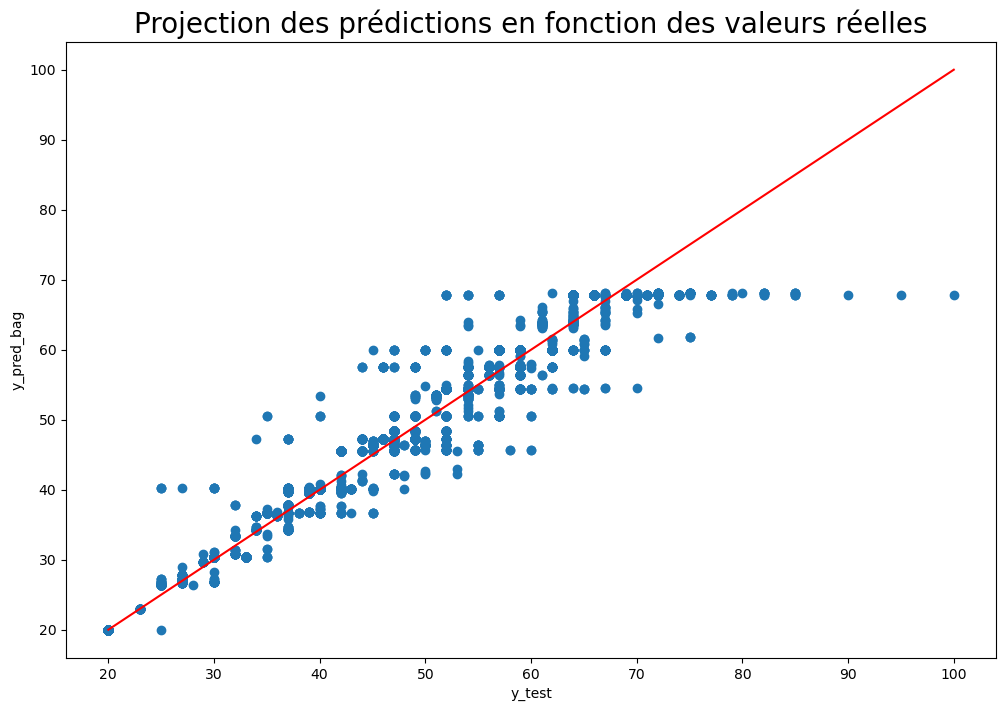

Exception ignored in: <function ResourceTracker.__del__ at 0x7b16aab8dc60>
Traceback (most recent call last):
  File "/home/didi/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/didi/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/didi/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x762febb95c60>
Traceback (most recent call last):
  File "/home/didi/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/didi/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/didi/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, y_pred_bag)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred_bag')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()